<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Logs_updated_data_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd

In [118]:
import torch
import torch.nn as nn

In [119]:
import torch.optim as optim

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [121]:
import matplotlib.pyplot as plt

In [122]:
file_path = '/content/logs_CAD_2024_1_.xlsx' # Data from Excel
data = pd.read_excel(file_path)

In [123]:
display(pd.DataFrame(data))

,timestamp,user,tool,logs,lesson,daypart
0,"15/04/24, 11:37:03",26861,233243,3.0,0,1
1,"15/04/24, 11:30:50",26861,2949,1.0,0,1
2,"15/04/24, 11:30:37",26861,244208,3.0,0,1
3,"15/04/24, 11:35:55",26861,2949,1.0,0,1
4,"15/04/24, 11:35:24",26861,250945,4.0,0,1
...,...,...,...,...,...,...
2975,"3/02/24, 14:44:28",29349,233210,2.0,0,2
2976,"3/02/24, 14:43:20",29349,2949,2.0,0,2
2977,"2/02/24, 10:22:38",29349,233180,2.0,0,1
2978,"2/02/24, 09:57:58",29349,233210,1.0,0,1


In [124]:
X = data.drop(['timestamp'], axis=1).values
y = data[['timestamp']].values

In [125]:
y = (y == 1).astype(float) # target values are 0 or 1

In [126]:
#  Preprocess Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
scaler = StandardScaler() # Standardize features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
# PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [129]:
class SimpleNN(nn.Module): # define the Model
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))
        return x


In [130]:
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)

In [131]:
criterion = nn.BCELoss()  # Loss Function and Optimizer for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [132]:
num_epochs = 100 # Train the Model
training_losses = []
validation_losses = []

In [133]:
import torch.nn as nn
import torch.nn.functional as F

In [134]:
class SimpleModel(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Ensure the output is in the range [0, 1]
        return x

In [135]:
import torch
import torch.optim as optim
import torch.nn as nn

In [136]:
# define the model
input_size = 10
hidden_size = 5
output_size = 1  #  for binary classification

model = SimpleModel(input_size, hidden_size, output_size)

In [137]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [138]:
# training data
X_train = torch.randn(100, input_size)
y_train = torch.randint(0, 2, (100, 1)).float()

In [139]:
X_test = torch.randn(30, input_size)  #  validation input
y_test = torch.randint(0, 2, (30, 1)).float()  #  binary labels

In [140]:
num_epochs = 100 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/100], Loss: 0.6927, Val Loss: 0.6908
Epoch [20/100], Loss: 0.6924, Val Loss: 0.6907
Epoch [30/100], Loss: 0.6920, Val Loss: 0.6905
Epoch [40/100], Loss: 0.6917, Val Loss: 0.6904
Epoch [50/100], Loss: 0.6913, Val Loss: 0.6903
Epoch [60/100], Loss: 0.6910, Val Loss: 0.6902
Epoch [70/100], Loss: 0.6906, Val Loss: 0.6901
Epoch [80/100], Loss: 0.6902, Val Loss: 0.6900
Epoch [90/100], Loss: 0.6899, Val Loss: 0.6899
Epoch [100/100], Loss: 0.6895, Val Loss: 0.6897


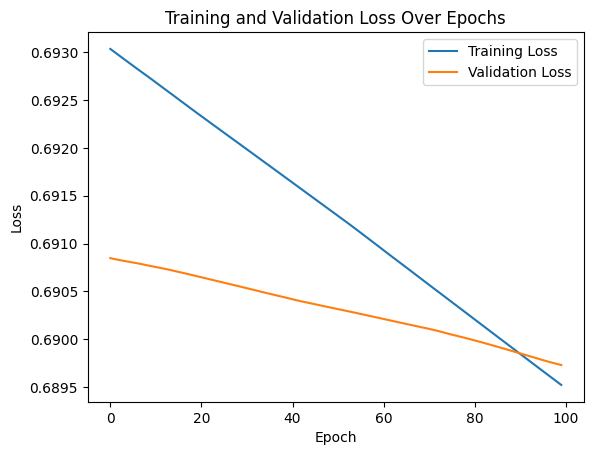

In [141]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [142]:
num_epochs = 200 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/200], Loss: 0.6892, Val Loss: 0.6896
Epoch [20/200], Loss: 0.6888, Val Loss: 0.6895
Epoch [30/200], Loss: 0.6885, Val Loss: 0.6894
Epoch [40/200], Loss: 0.6881, Val Loss: 0.6892
Epoch [50/200], Loss: 0.6877, Val Loss: 0.6891
Epoch [60/200], Loss: 0.6874, Val Loss: 0.6890
Epoch [70/200], Loss: 0.6870, Val Loss: 0.6889
Epoch [80/200], Loss: 0.6867, Val Loss: 0.6888
Epoch [90/200], Loss: 0.6864, Val Loss: 0.6887
Epoch [100/200], Loss: 0.6860, Val Loss: 0.6887
Epoch [110/200], Loss: 0.6857, Val Loss: 0.6887
Epoch [120/200], Loss: 0.6854, Val Loss: 0.6887
Epoch [130/200], Loss: 0.6850, Val Loss: 0.6887
Epoch [140/200], Loss: 0.6847, Val Loss: 0.6887
Epoch [150/200], Loss: 0.6843, Val Loss: 0.6887
Epoch [160/200], Loss: 0.6840, Val Loss: 0.6887
Epoch [170/200], Loss: 0.6836, Val Loss: 0.6886
Epoch [180/200], Loss: 0.6833, Val Loss: 0.6887
Epoch [190/200], Loss: 0.6829, Val Loss: 0.6887
Epoch [200/200], Loss: 0.6825, Val Loss: 0.6888


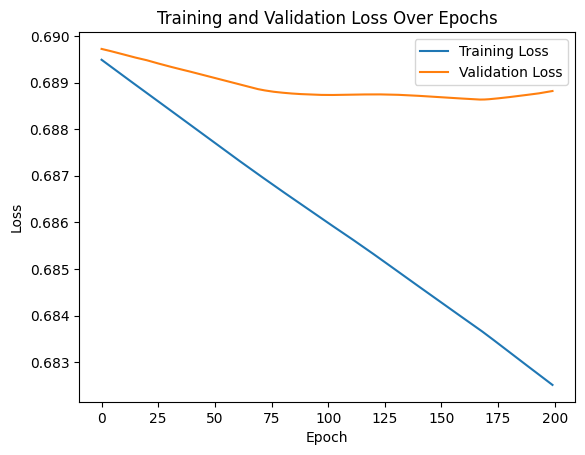

In [143]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [144]:
model.eval() # evaluate the Model
with torch.no_grad():
    y_predicted = model(X_test).round()

In [145]:
unique_values = y_predicted.unique()
print(f'Unique values in predictions: {unique_values}')

Unique values in predictions: tensor([0., 1.])


The unique values tensor([0., 1.]) in the model's predictions indicate that the model is making binary predictions and can predict both classes.



In [146]:
# is y_test correctly shaped for sklearn's classification_report?
y_test_flat = y_test.flatten()

In [147]:
if len(unique_values) == 1:  # if only one class is predicted, avoid using classification_report
    print(f'Only one class ({unique_values.item()}) predicted. Cannot generate classification report.')
else:
    print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.47      0.54      0.50        13
     class 1       0.60      0.53      0.56        17

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.53        30
weighted avg       0.54      0.53      0.54        30



In [148]:
print(pd.Series(y_train.numpy().flatten()).value_counts())  # check Data Distribution

1.0    51
0.0    49
Name: count, dtype: int64


In [149]:
with torch.no_grad(): # inspect Model Predictions
    raw_outputs = model(X_test)
    print(raw_outputs[:10])

tensor([[0.4863],
        [0.5165],
        [0.5578],
        [0.5086],
        [0.4999],
        [0.5560],
        [0.5281],
        [0.5227],
        [0.5593],
        [0.4953]])


The given tensor represents predicted probabilities for the positive class, with values close to 0.5644 indicating certainty in the predictions.

In [150]:
threshold = 0.3  # adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.3: tensor([1.])
Only one class (1.0) predicted with threshold 0.3.


In [151]:
threshold = 0.5  # adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.5: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       0.47      0.54      0.50        13
     class 1       0.60      0.53      0.56        17

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.53        30
weighted avg       0.54      0.53      0.54        30

